# Vektoren und Matrizen in NumPy

Das Paket `numpy` (_Numeric Python_) wird üblicherweise unter der Abkürzung `np` importiert, das verbreitete `matplotlib` für Visualisierungen unter `plt`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

## Vektoren und Matrizen

In `numpy` sind Vektoren und Matrizen Spezialfälle der allgemeinen Datenstruktur **Array**, die auch mehr als zwei Achsen haben kann. Arrays unterscheiden sich von Python-Listen v.a. darin, dass sie nur Elemente des gleichen Typs (meistens Gleitkommazahlen) enthalten.

In [2]:
x = np.array([1, 2, 3]) # Vektor
x

array([1, 2, 3])

In [3]:
M = np.array([[11, 12, 13], [21, 22, 23], [31, 32, 33]]) # Matrix
M

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

Das Format (_shape_) des Arrays zeigt uns, dass $\mathbf{x}\in \mathbb{R}^3$ und $\mathbf{M}\in \mathbb{R}^{3\times 3}$ ist.

In [4]:
print(x.shape)
print(M.shape)

(3,)
(3, 3)


Einige andere Möglichkeiten, Vektoren und Arrays zu erzeugen:

In [5]:
print( np.zeros((3, 5))    )
print( np.ones((3, 5))     )
print( np.full((3, 5), 42) )
print( np.eye(3)           ) # Identitätsmatrix (=> später)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[42 42 42 42 42]
 [42 42 42 42 42]
 [42 42 42 42 42]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Vektoren aus Zahlenfolgen (praktisch für Beispiele):

In [6]:
print(np.arange(10, 21, 2))
print(np.linspace(1, 2, 6))

[10 12 14 16 18 20]
[1.  1.2 1.4 1.6 1.8 2. ]


Matrix kann daraus durch Umformen (_reshape_) erstellt werden (wird zeilenweise befüllt).

In [7]:
np.arange(1, 16).reshape((3, 5))

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

Mehr Abwechslung durch Zufallsvektoren und -matrizen:

In [8]:
print(np.random.random(size=(3, 5)))
print(np.random.normal(0, 1, size=(10,)))

[[0.4423222  0.7914324  0.44361998 0.73602559 0.44615544]
 [0.20428622 0.13572133 0.18902213 0.45006235 0.55003203]
 [0.42076103 0.45170995 0.38015824 0.47376864 0.87399636]]
[-0.05003007 -0.98437622  0.35109581  0.218906   -0.75169267 -0.35340597
  0.34942152  0.14336663 -0.66998021  0.34337107]


Zugriff auf einzelne Elemente und Teilbereiche (_slices_) durch Indexierung:

In [9]:
print(x[2])
print(M[1, 0])

3
21


In [10]:
print(x[0:2])
print(M[:2, 1:])
print(M[1, :])   # Was ist der 
print(M[1:2, :]) # Unterschied?

[1 2]
[[12 13]
 [22 23]]
[21 22 23]
[[21 22 23]]


Elemente können durch Zuweisung auch verändert werden:

In [11]:
x[2] = 42
x

array([ 1,  2, 42])

In [12]:
M[1, :] = np.arange(41, 44)
M

array([[11, 12, 13],
       [41, 42, 43],
       [31, 32, 33]])

**Achtung:** Teilbereiche sind keine Kopien, sondern Referenzen in das ursprüngliche Array. Sie können mit `.copy()` in eine unabhängige Kopie verwandelt werden.

In [13]:
M1 = M[1:, 1:]
M1 *= 0
M

array([[11, 12, 13],
       [41,  0,  0],
       [31,  0,  0]])

Auch die Zuweisung ganzer Arrays erzeugt keine Kopien:

In [14]:
y = x
y[2] = 54
x

array([ 1,  2, 54])

## Vektor-Operationen

Als Beispiel definieren wir zwei Vektoren $\mathbf{x}, \mathbf{y}\in \mathbb{R}^5$.

In [15]:
x = np.arange(1, 6)
y = np.linspace(.8, 0, 5)

Mit `np.concatenate`, `np.hstack` und `np.vstack` können Vektoren zu Matrizen verkettet werden. Hier nutzen wir diese Möglichkeit nur zur übersichtlichen Anzeige:

In [16]:
np.vstack([x, y])

array([[1. , 2. , 3. , 4. , 5. ],
       [0.8, 0.6, 0.4, 0.2, 0. ]])

Elementare Vektoroperationen sind die **Addition** $\mathbf{x} + \mathbf{y}$ und **Skalarmultiplikation** $\lambda \mathbf{x}$.

In [17]:
print(x + y)
print(10 * x)

[1.8 2.6 3.4 4.2 5. ]
[10 20 30 40 50]


Vektoren können natürlich nur addiert werden, wenn sie aus dem gleichen Vektorraum kommen (d.h. das gleiche _shape_ haben).

In [18]:
x + np.arange(1, 4)

ValueError: operands could not be broadcast together with shapes (5,) (3,) 

Auch andere arithmetische Operationen und mathematische Funktionen werden **elementweise** ausgeführt, z.B. das **Hadamard-Produkt** $\mathbf{x}\odot \mathbf{y}$.  Für mathematischen Funktionen müssen die Implementierungen aus `np` verwendet werden, nicht aus `math`.

In [19]:
print(x * y)
print(x ** 2)
print(x ** x)
print(-y)
print(np.cos(y))

[0.8 1.2 1.2 0.8 0. ]
[ 1  4  9 16 25]
[   1    4   27  256 3125]
[-0.8 -0.6 -0.4 -0.2 -0. ]
[0.69670671 0.82533561 0.92106099 0.98006658 1.        ]


Wir können auch Summe und Produkt aller Elemente bilden, oder Minimum und Maximum finden.

In [20]:
print(np.sum(y))
print(np.prod(x)) # 5! (Fakultät)
print(np.min(y))
print(np.max(y))
print(np.argmin(y)) # Was macht das?

2.0
120
0.0
0.8
4


> **Aufgabe:**
> - Berechnen Sie den Mittelwert der Elemente von $\mathbf{x}$ und $\mathbf{y}$ (jeweils separat).
> - Vergleichen Sie Ihr Ergebnis mit der Ausgabe von `np.mean()`.
> - Wie können Sie am einfachsten den Mittelwert über beide Vektoren hinweg bestimmen?

In [21]:
print(np.sum(x) / x.shape[0], np.mean(x))
print(y.sum() / y.shape[0], y.mean())
print(np.concatenate([x, y]).mean())

3.0 3.0
0.4 0.4
1.7


## Matrix-Operationen

Auch hier definieren wir zwei einfache Beispielmatrizen $\mathbf{A}, \mathbf{B}\in \mathbb{R}^{3\times 5}$

In [22]:
A = np.arange(1, 16).reshape((3, 5))
B = np.array([ np.full(5, x) for x in (100, 200, 300) ])
print(A)
print(B)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]
[[100 100 100 100 100]
 [200 200 200 200 200]
 [300 300 300 300 300]]


Matrizen des gleichen Formats bilden ebenfalls einen Vektorraum mit Addition $\mathbf{A} + \mathbf{B}$ und Skalarprodukt $\lambda \mathbf{A}$.

In [23]:
print(A + B)
print(10 * A)

[[101 102 103 104 105]
 [206 207 208 209 210]
 [311 312 313 314 315]]
[[ 10  20  30  40  50]
 [ 60  70  80  90 100]
 [110 120 130 140 150]]


Wie bei Vektoren werden auch alle anderen arithmetischen Operationen und mathematischen Funktionen elementweise ausgeführt, u.a. $\mathbf{A}\odot \mathbf{B}$ und $\sqrt{\mathbf{B}}$.

In [24]:
print(A * B)
print(np.sqrt(B))

[[ 100  200  300  400  500]
 [1200 1400 1600 1800 2000]
 [3300 3600 3900 4200 4500]]
[[10.         10.         10.         10.         10.        ]
 [14.14213562 14.14213562 14.14213562 14.14213562 14.14213562]
 [17.32050808 17.32050808 17.32050808 17.32050808 17.32050808]]


Weitere spezielle Matrix-Operationen, u.a. die **Matrixmultiplikation** $\mathbf{A} \mathbf{B}$, lernen wir in den nächsten Wochen noch kennen.

Wir können wiederum das Maximum und Minimum einer Matrix bestimmen, sowie Summe und Produkt aller Elemente.

In [25]:
print(np.max(A))
print(np.sum(B))

15
3000


Viel interessanter ist es aber oft, diese Operationen **spaltenweise** bzw. **zeilenweise** auszuführen, was mit dem optionalen Argument `axis=` erreicht werden kann.

In [26]:
print(np.max(A, axis=1)) # Achse 1 = Spaltenindex => Maximum über die Elemente einer Zeile
print(np.sum(B, axis=0)) # Achse 0 = Zeilenindex => Summe über die Elemente einer Spalte

[ 5 10 15]
[600 600 600 600 600]


> **Aufgabe:** Berechnen Sie die Mittelwerte der Zeilen und Spalten von $\mathbf{A}$.

In [27]:
print(np.mean(A, axis=1))
print(np.mean(A, axis=0))

[ 3.  8. 13.]
[ 6.  7.  8.  9. 10.]


## Kombination von Vektoren und Matrizen

Ein Vektor $\mathbf{x}\in \mathbf{R}^n$ kann auch als Matrix mit einer Spalte bzw. einer Zeile aufgefasst werden. Wir sprechen dann von einem **Spaltenvektor** $\mathbf{x}\in \mathbf{R}^{n\times 1}$ bzw. einem **Zeilenvektor** $\mathbf{x}^T\in \mathbf{R}^{1\times n}$. Die Notation $\mathbf{A}^T$ bezeichnet dabei die **Transposition** der Matrix $\mathbf{A}$.

Formal handelt es sich bei Spalten- und Zeilenvektor um Matrizen, nicht um Vektoren. Sie müssen deshalb in NumPy durch eine entsprechende Formatänderung erstellt werden.  Zunächst der Spaltenvektor, der auf zwei verschiedene Arten erstellt werden kann:

In [28]:
xC = x.reshape((5, 1))  # Überzeugen Sie sich, dass beide das gleich Ergebnis liefern.
xC = x[:, np.newaxis]   # Was ist der Vorteil dieser Variante?
xC = x.reshape((-1, 1)) # eine weitere geschickte Lösung
xC

array([[1],
       [2],
       [3],
       [4],
       [5]])

Der Zeilenvektor kann analog direkt erstellt werden, oder geht durch Transposition aus dem Spaltenvektor hervor:

In [29]:
xR = x.reshape((1, 5))
xR = x[np.newaxis, :]
xR = x.reshape((1, -1))
xR = xC.T
xR # Sehen Sie den Unterschied zur Darstellung von x?

array([[1, 2, 3, 4, 5]])

**Achtung:** `xR` und `xC` sind wieder keine echten Kopien, sondern Referenzen. Wenn Sie z.B. `xR *= 2` ausführen, werden auch `x` und `xC` verändert!

Wenn wir eine Operation auf eine Matrix und einen Zeilenvektor anwenden, dann werden die Elemente des Vektors automatisch für jede Zeile der Matrix wiederholt. Man nennt dieses Verhalten von NumPy **Broadcasting**.

In [30]:
B + xR

array([[101, 102, 103, 104, 105],
       [201, 202, 203, 204, 205],
       [301, 302, 303, 304, 305]])

**Achtung:** Entgegen der üblichen mathematischen Notation wird ein „normaler“ Vektor beim Broadcasting als Zeilenvektor $\mathbf{x}^T$ interpretiert, nicht als Spaltenvektor, d.h. es wird automatisch die fehlende zusätzliche Achse an _erster_ Stelle eingefügt.  Es ist empfehlenswert, immer zunächst explizit einen Zeilen- oder Spaltenvektor zu erstellen.

In [31]:
B + x

array([[101, 102, 103, 104, 105],
       [201, 202, 203, 204, 205],
       [301, 302, 303, 304, 305]])

> **Aufgabe:** Angenommen, die Elemente von $\mathbf{A}$ würden Worthäufigkeiten in Texten darstellen (also eine _bag-of-words_-Matrix). Berechnen Sie relative Häufigkeiten, indem Sie alle Werte einer Zeile jeweils durch die Zeilensumme teilen.

In [32]:
A / np.sum(A, axis=1)[:, np.newaxis]

array([[0.06666667, 0.13333333, 0.2       , 0.26666667, 0.33333333],
       [0.15      , 0.175     , 0.2       , 0.225     , 0.25      ],
       [0.16923077, 0.18461538, 0.2       , 0.21538462, 0.23076923]])

Was passiert beim Broadcasting, wenn wir einen Zeilenvektor und einen Spaltenvektor multiplizieren?

In [33]:
xR * xC

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

## Das klassische Beispiel: Schwertlilien

Der berühmte **Iris**-Datensatz ist u.a. in Scikit-Learn enthalten:

In [34]:
iris = sklearn.datasets.load_iris()

Nicht vergessen: immer die zugehörige Dokumentation lesen!

In [35]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Im maschinellen Lernen ist es üblich, die **Merkmalsmatrix** mit $\mathbf{X}$ zu bezeichnen und den (Spalten-)Vektor der vorherzusagenden Kategorien oder numerischen **Werte** mit $\mathbf{y}$.

In [36]:
X = iris.data
y = iris.target

In [37]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


Zum Ausprobieren erstellen wir eine Stichprobe von 10 Blütenexemplaren, der Einfachheit gleichmäßig über den Datensatz verteilt. Die Werte $\mathbf{y}$ werden wir in der heutigen Sitzung nicht weiter verfolgen.

In [38]:
X1 = X[5:150:15, :].copy()
X1

array([[5.4, 3.9, 1.7, 0.4],
       [5.4, 3.4, 1.7, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [7. , 3.2, 4.7, 1.4],
       [6.7, 3.1, 4.4, 1.4],
       [5.5, 2.4, 3.8, 1.1],
       [5.7, 3. , 4.2, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [7.2, 3.2, 6. , 1.8],
       [6.7, 3.1, 5.6, 2.4]])

NumPy-Arrays haben keine Zeilen- oder Spaltenlabel und können nur über numerisch indexiert werden. Auch die Bedeutung der Spalten erschließt sich nur durch die separat bereitgestellten Bezeichnungen:

In [39]:
print(", ".join(iris.feature_names))

sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)


Merkmalsvektor einer einzelnen Blüte: $\mathbf{x}_{42} \in \mathbb{R}^4$

In [40]:
X[41, :]

array([4.5, 2.3, 1.3, 0.3])

Vor allem bei solchen niedrigdimensionalen Datensätzen bietet sich als Einstieg eine Visualisierung in zwei oder drei Dimensionen an. Das Standardpaket dafür ist `matplotlib`. In den nächsten Sitzungen werden wir auch noch modernere Pakete kennenlernen. Optional können Sie aber schon die etwas hübscheren Defaulteinstellungen von `seaborn` nutzen.

In [41]:
import seaborn as sns
sns.set()

Standardvisualisierung für Merkmalsvektoren ist ein sogenannter **Scatterplot**. Dazu müssen wir jeweils zwei Dimensionen auswählen, z.B. Länge und Breite der Blütenblätter (in der dritten und vierten Spalte von $\mathbf{X}$).  Wir verwenden hier bereits einige Optionen, um die Darstellung zu verschönern.

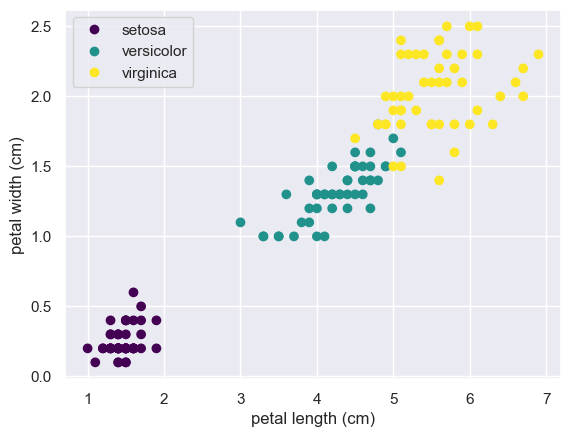

In [42]:
scatter = plt.scatter(X[:,2], X[:,3], c=y, cmap='viridis')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.legend(scatter.legend_elements()[0], iris.target_names)

> **Aufgabe:** Definieren Sie eine Hilfsfunktion, um solche Plots für jeweils zwei beliebige Merkmalsdimensionen zu erstellen.

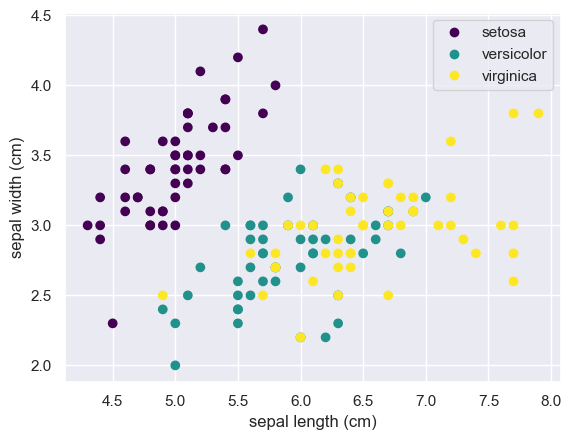

In [43]:
def plot2(ix, iy):
    scatter = plt.scatter(X[:,ix], X[:,iy], c=y, cmap='viridis')
    plt.xlabel(iris.feature_names[ix])
    plt.ylabel(iris.feature_names[iy])
    plt.legend(scatter.legend_elements()[0], iris.target_names)
plot2(0, 1)

Wir können mit `matplotlib` auch 3D-Visualisierungen erstellen:

Text(0.5, 0, 'sepal length (cm)')

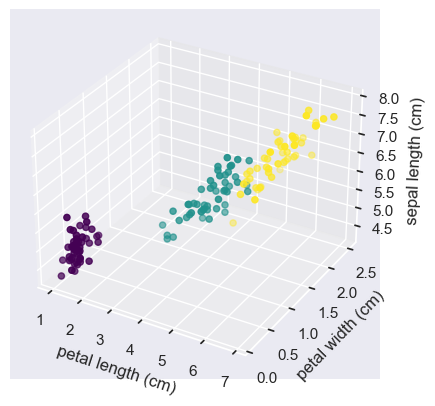

In [44]:
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,2], X[:,3], X[:,0], c=y, cmap='viridis')
ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])
ax.set_zlabel(iris.feature_names[0])

> **Aufgabe:** Als Maß für die Größe der Blütenblätter (_petals_) und Kelchblätter (_sepals_) ziehen wir das Produkt aus Länge und Breite heran.
> - Verwenden Sie geeignete Vektor- und Matrixoperationen um das Blütenexemplar mit den größten Blütenblättern und das Exemplar mit den größten Kelchblättern zu finden.
> - Erstellen Sie einen Scatterplot, der die Größe von Blüten- und Kelchblättern zeigt.

Text(0, 0.5, 'petal size')

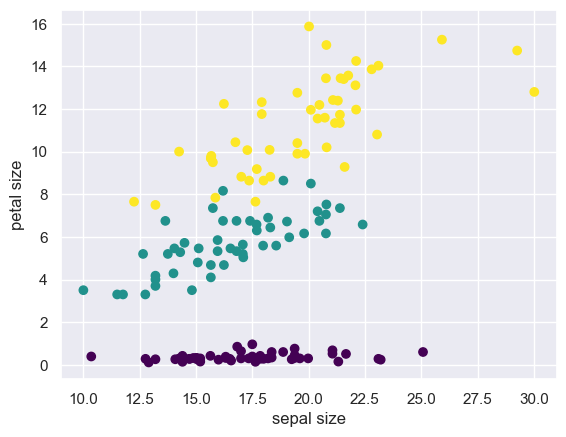

In [45]:
a_sep = X[:, 0] * X[:, 1]       # erste Möglichkeit
a_pet = X[:, 2:4].prod(axis=1)  # zweite Möglichkeit
plt.scatter(a_sep, a_pet, c=y, cmap="viridis")
plt.xlabel("sepal size")
plt.ylabel("petal size")

## Datentransformation mit NumPy

Als Vorbereitung für maschinelle Lernverfahren wollen wir die vier Merkmale **standardisieren**, d.h. durch **z-scores**
$$ z_i = \frac{x_i - \mu_i}{\sigma_i} $$
ersetzen. Als erstes benötigen wir den Vektor der Mittelwerte der Spalten von $\mathbf{X}$ (wir verwenden hier zur übersichtlicheren Darstellung die kleinere Matrix `X1`).

In [46]:
mu = X1.mean(axis=0)
mu

array([6.11, 3.17, 3.84, 1.21])

Wir können die Merkmalsverteilungen nun **zentrieren** zu $u_i = x_i - \mu_i$.

In [47]:
U1 = X1 - mu[np.newaxis, :]
U1

array([[-0.71,  0.73, -2.14, -0.81],
       [-0.71,  0.23, -2.14, -1.01],
       [-1.11,  0.03, -2.64, -1.01],
       [ 0.89,  0.03,  0.86,  0.19],
       [ 0.59, -0.07,  0.56,  0.19],
       [-0.61, -0.77, -0.04, -0.11],
       [-0.41, -0.17,  0.36, -0.01],
       [ 0.39,  0.03,  1.26,  0.79],
       [ 1.09,  0.03,  2.16,  0.59],
       [ 0.59, -0.07,  1.76,  1.19]])

In [48]:
U1.mean(axis=0) # zur Kontrolle

array([-1.06581410e-15,  1.33226763e-16,  1.77635684e-16, -2.22044605e-16])

Nun müssen wir die Varianzen berechnen:
$$ \sigma_i^2 = \frac{1}{n} \sum_{k=1}^n (x_{ki} - \mu_i)^2 = \frac{1}{n} \sum_{k=1}^n u_{ki}^2 $$
(Statistiker würden durch $n-1$ teilen statt durch $n$).

In [49]:
sigma2 = (U1 ** 2).sum(axis=0) / U1.shape[0]
sigma2

array([0.5609, 0.1221, 2.6664, 0.5169])

In [50]:
X1.var(axis=0) # zur Kontrolle

array([0.5609, 0.1221, 2.6664, 0.5169])

Damit können wir die **z-scores** $z_i = u_i / \sigma_i$ berechnen:

In [51]:
Z1 = U1 / np.sqrt(sigma2)[np.newaxis, :]
Z1

array([[-0.94801592,  2.0891279 , -1.31054254, -1.12663114],
       [-0.94801592,  0.65821838, -1.31054254, -1.40481167],
       [-1.48210939,  0.08585457, -1.61674407, -1.40481167],
       [ 1.18835798,  0.08585457,  0.52666663,  0.2642715 ],
       [ 0.78778787, -0.20032733,  0.34294571,  0.2642715 ],
       [-0.81449255, -2.20360066, -0.02449612, -0.15299929],
       [-0.54744581, -0.48650924,  0.2204651 , -0.01390903],
       [ 0.52074114,  0.08585457,  0.77162785,  1.09881309],
       [ 1.45540472,  0.08585457,  1.3227906 ,  0.82063256],
       [ 0.78778787, -0.20032733,  1.07782938,  1.65517415]])

In [52]:
Z1.std(axis=0) # Standardabweichung σ zur Kontrolle berechnen

array([1., 1., 1., 1.])

> **Aufgabe:** Standardisieren Sie nun auch die volle Matrix `X`. Schaffen Sie es mit einer einzigen Zeile Python-Code?

In [53]:
Z = (X - X.mean(axis=0)[np.newaxis, :]) / X.std(axis=0)[np.newaxis, :]

Zur Dimensionsreduktion hochdimensionaler Merkmalsräume wird oft eine Hauptkomponentenanalyse (**PCA** = _principal component analysis_) eingesetzt. Eine Implementierung dieses Algorithmus findet sich in Scikit-Learn.

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
P1 = pca.fit_transform(Z1)
P1

array([[ 2.40249835, -1.54642247],
       [ 2.22078961, -0.19665887],
       [ 2.54696552,  0.53045224],
       [-1.06702263, -0.51956221],
       [-0.81527442, -0.10839164],
       [ 0.01003096,  2.35399501],
       [ 0.05386635,  0.64631556],
       [-1.32947929, -0.32615298],
       [-1.98910252, -0.64992501],
       [-2.03327194, -0.18364964]])

Die PCA-Dimensionen („Hauptachsen“) sind bereits zentriert. Wir können sie also leicht erneut standardisieren, um eine sog. **Whitening** zu erreichen (oder einfach das PCA-Objekt mit der Option `whiten=True` anlegen).

In [55]:
print(P1.mean(axis=0))
print(P1 / P1.std(axis=0))

[ 4.44089210e-17 -5.55111512e-18]
[[ 1.41432635 -1.58537053]
 [ 1.30735626 -0.2016119 ]
 [ 1.49937271  0.54381217]
 [-0.62814537 -0.53264785]
 [-0.47994376 -0.11112158]
 [ 0.00590512  2.41328252]
 [ 0.03171057  0.6625936 ]
 [-0.78265094 -0.33436744]
 [-1.17096443 -0.66629397]
 [-1.19696651 -0.18827503]]


> **Aufgabe:** Erstellen Sie einen Scatterplot der ersten beiden PCA-Dimensionen für den vollständigen Datensatz.

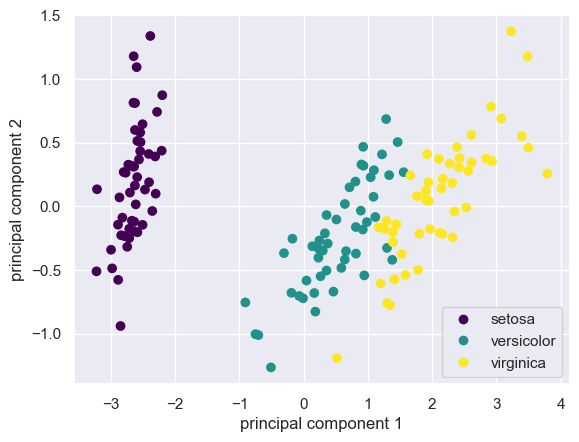

In [56]:
P = pca.fit_transform(X)
scatter = plt.scatter(P[:,0], P[:,1], c=y, cmap='viridis')
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.legend(scatter.legend_elements()[0], iris.target_names)